<h1><center><u> Recherche textuelle </u></center></h1>

## 1. Préambule

*(adaptation du document d'accompagnement d' eduscol.education.fr/ )*<br>
Intéressons nous aux animaux qui interviennent dans les fables de La Fontaine (1621 - 1695). <br>Pour ce faire, commencer par charger le recueil en exécutant la cellule suivante.

In [ ]:
fichier = open('lafontaine.txt', 'r') 
fables = fichier.read()
fichier.close()

Ce fichier texte est vu comme une longue chaîne de caractères dont on peut récupérer la taille :

In [ ]:
len(fables)

Dans cette chaîne de caractères, de type ***str***, on peut rechercher la présence de chaînes de caractères de plus petites tailles que l'on appellera des motifs.<br>
La méthode ***find(motif)*** retourne le premier indice d'apparition du motif dans la chaîne, et -1 si le motif n'existe pas dans cette chaîne. <br>
On peut ainsi s'intéresser aux animaux présents dans le livre.

In [ ]:
fables.find("tux")

In [ ]:
fables.find("renard")

In [ ]:
fables.find("lion")

On peut même s'intéresser à ce qui suit le motif repéré …

In [ ]:
fables[14665:14700]

La Fontaine parle de renard, même de lion mais ne connaît pas tux …

<div class="alert alert-info" role="alert"><b>énigme 1</b> : utiliser les deux cellules de code ci-dessous pour trouver un animal qui apparaît dans les fables et un autre qui n'en fait pas partie.</div>

On peut aussi s'intéresser au nombre d'occurences d'un motif particulier en utilisant la fonction ci-dessous.

In [ ]:
def nbOccurences(texte, motif): 
    compteur, i, indices = 0, 0, []
    while True:
        occurrence = texte.find(motif, i)
        # occurrence est l'index du sous-texte à partir de l'index i
        if occurrence == -1: 
            return compteur, indices
        else:
            compteur += 1
            indices.append(occurrence)
            i = occurrence + 1

In [ ]:
nbOccurences(fables, "lion")

In [ ]:
nbOccurences(fables, "renard")

In [ ]:
nbOccurences(fables, "chien")

In [ ]:
nbOccurences(fables, "singe")

La Fontaine cite donc le lion autant de fois que le renard mais légèrement moins que le chien. Le singe est moins fréquent.

<div class="alert alert-info" role="alert"><b>énigme 2</b> : utiliser les deux cellules de code ci-dessous pour trouver un animal qui apparaît plus fréquemment que le chien et un autre qui apparaît moins fréquemment que le singe.

## 2. Objectif et notations 

L'objectif de ce TP est de chercher comment pourrait-être codée la méthode ***find(motif)***. C'est à dire comment détecter la première occurence d'une chaîne de caractères ***motif*** de longueur ***p*** dans un texte de longueur ***n*** > ***p***.

### a. algorithme naïf

<div class="alert alert-info" role="alert">

Écrivez dans la cellule ci-dessous (cliquer dedans pour l'activer) un algorithme **EN PSEUDO-CODE** pour effectuer cette recherche en parcourant le texte caractère par caractère. (vous pouvez saisir **deux espaces** pour faire un retour à la ligne).

</div>

Algo naïf :  
(à écrire)

<div class="alert alert-success" role="alert">
<details ><summary style="summary::-webkit-details-marker { color:##dff0d8; background:#dff0d8;} ">
    
**Quelques indications** (cliquez ici pour afficher)
</summary>
    <ul><li> parcourir le texte caractère à caractère</li>
        <li> repérer un caractère correspondant au premier du motif</li>
        <li> tester les suivants du motif </li>
        <li> poursuivre plus loin dans le texte en cas d'échec </li></ul>
</details></div>

<div class="alert alert-info" role="alert"> Ecrire dans la cellule ci-dessous le code Python d'une fonction <b><i> recherche_naive(texte, motif)</i></b> qui prend en paramètres le texte sous forme de chaîne de caractères <b><i>texte</i></b> et la chaîne de caractères recherchée <b><i> motif </i></b> et <b>renvoie</b> l'<b>indice de la première occurence</b> en cas de succès et <b>- 1</b> sinon.</div>

<div class="alert alert-info" role="alert"> Tester dans la cellule ci-dessous la fonction précédente sur le texte et les animaux de la partie 1 et vérifier la cohérence des résultats. </div>

Remarque : cet algorithme naïf a une complexité, dans le pire des cas, de $p(n-p)$.

### b. algorithme de Boyer-Moore

https://fr.wikipedia.org/wiki/Algorithme_de_Boyer-Moore

**Le principe** : <br>
Le principe de base est de comparer le dernier caractère du motif avec un caractère du texte et en cas de correspondance, de comparer les caractères précédents.

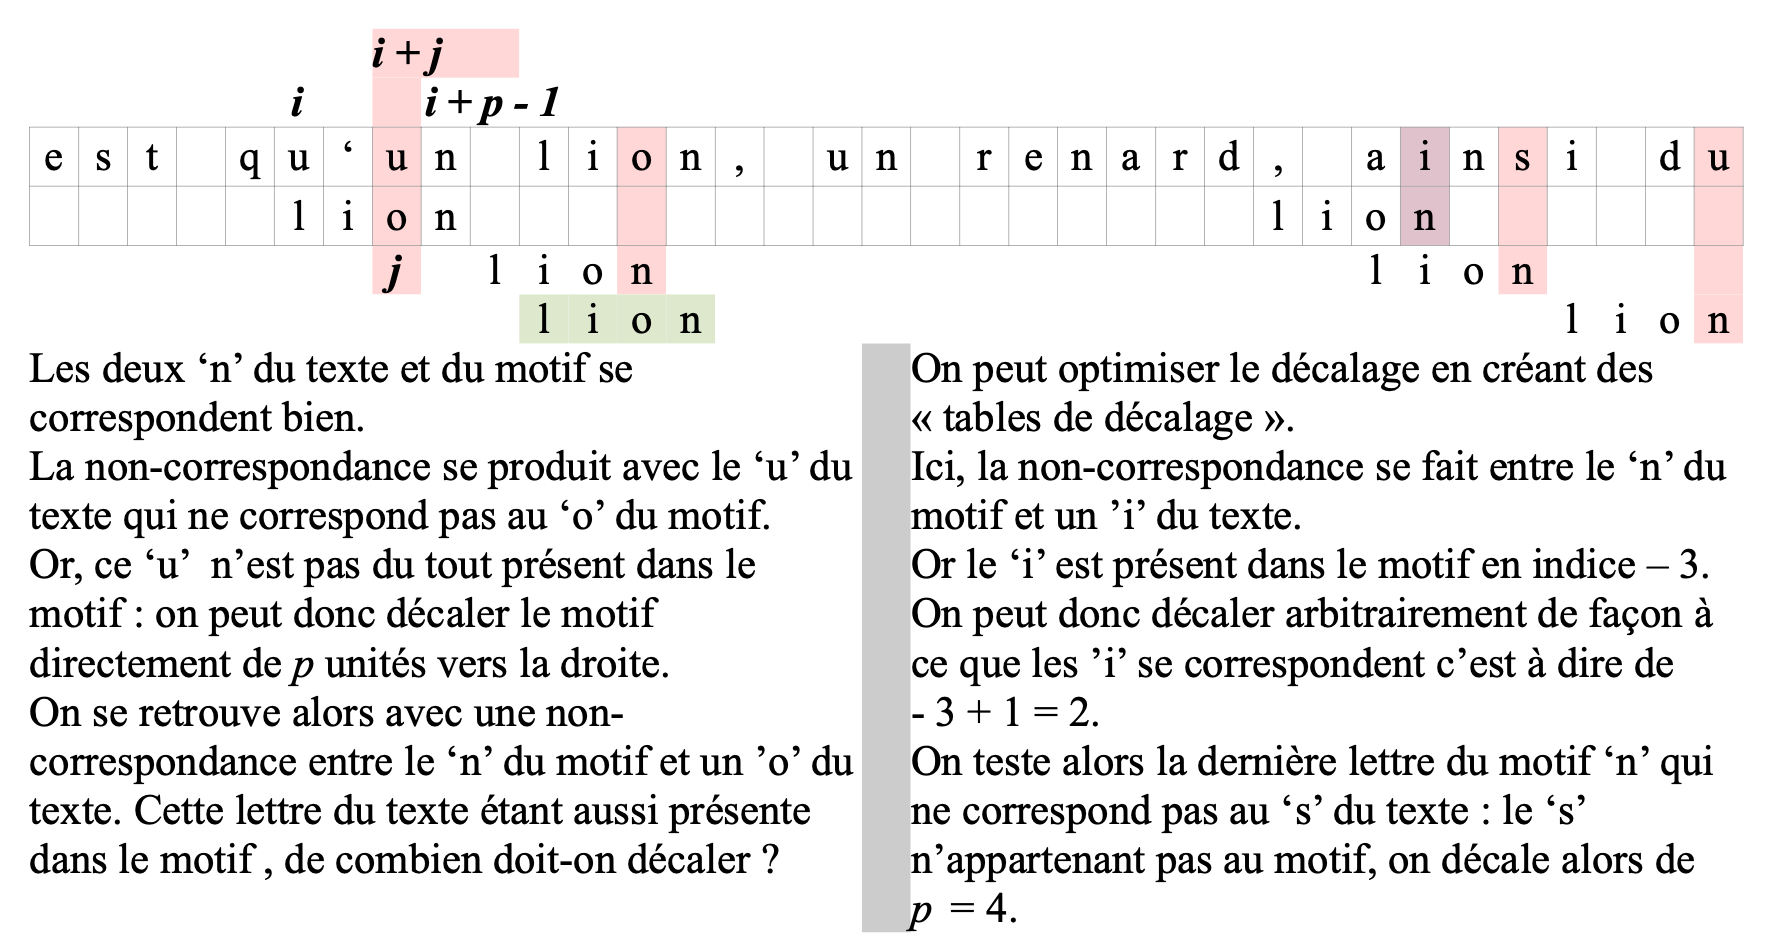

Les « tables de décalage » prennent la forme de **dictionnaires** : les **clés** sont les **lettres du motif** et les **valeurs** sont les **valeurs de décalage correspondantes**. <br>
Pour le "lion" par exemple, 
`decalage = {'l' : 3, 'i' : 2, 'o' : 1}` que l’on peut aisément construire en parcourant le motif car la **valeur** est égale à $p – 1 – indice$ .<br>
*Attention* : pour la dernière lettre, on décale de la taille du motif et pas de **0**<br>
Si la lettre n’est pas dans le motif (donc pas dans le dictionnaire), on **décale** de la **longueur du motif**.
<br><br>
Remarque : si une lettre est présente plusieurs fois dans le motif, c’est le décalage le plus faible qui est à privilégier. Dans la construction du dictionnaire, la seconde valeur, plus faible, va écraser la première.

<div class="alert alert-info" role="alert"> Ecrire dans la cellule ci-dessous le code Python d'une fonction <b><i> decalage(motif)</i></b> qui prend en paramètre une chaîne de caractères <b><i> motif </i></b> et renvoie le dictionnaire des décalages.</div>

<div class="alert alert-success" role="alert">
<details ><summary style="summary::-webkit-details-marker { color:##dff0d8; background:#dff0d8;} ">
    
**Quelques indications** (cliquez ici pour afficher)
</summary>
    <ul><li> créer un dictionnaire vide</li>
        <li> parcourir le motif caractère par caractère sauf le dernier</li>
        <li> la valeur associée au caractère est longueur du motif - 1 - indice  </li></ul>
</details></div>

<div class="alert alert-info" role="alert"> Tester dans la cellule ci-dessous la fonction précédente pour le "lion" et le "renard" et vérifier la cohérence des résultats. </div>

On s'intéresse maintenant au programme de parcours. Son algorithme peut être résumé de la façon suivante :<br>
si <i>n</i> désigne la longueur du texte, <i>p</i> celle du motif et <i>i</i> = <i>p-1</i> l'indice du caractère de texte :
<ul><li>tant  que i &lt; n :</li>
    <ul> 
    <li>si le caractère d'indice <i>i</i> correspond au dernier caractère du motif :</li>
        <ul>
    <li>correspondance = True et on commence à parcourir le motif à l'envers</li>
    <li>tant que le parcours du motif n'est pas terminé et que correspondance == True :
            <ul><li> si le caractère du texte correspond toujours à celui du motif en vis à vis: </li>
                <ul><li>on s'intéresse aux caractères précédents</li></ul>
            </ul>
            <ul><li>sinon:
                 <ul><li>correspondance = False</li>
                     <li>on utilise le dictionnaire de décalage pour décaler <i>i</i></li>
                </ul>
                </li></ul></li>
            <li>si le motif a été parcouru intégralement et que correspondance == True on retourne l'indice</li>
             </ul>
        <li> sinon on utilise le dictionnaire de décalage pour décaler <i>i</i> </li>
        </ul>
    <li>retourne - 1 (si on n'est pas sorti avant) </li>
    </ul>

<div class="alert alert-info" role="alert"> Compléter dans la cellule ci-dessous le code Python de la fonction <b><i> boyer_moore(texte,motif)</i></b> qui prend en paramètres le texte sous forme de chaîne de caractères <b><i>texte</i></b> et la chaîne de caractères recherchée <b><i> motif </i></b> et renvoie l'indice de la première occurence en cas de succès et - 1 sinon. <br>Attention à appliquer correctement le décalage en fonction de l'indice regardé.</div>

In [ ]:
def boyer_moore(texte, motif):
    n = len(texte)
    p = len(motif)
    decale = decalage(motif)
    i = p - 1
    while i < n:
        # à compléter
        pass
    return - 1

assert boyer_moore("abracadabra","aba") == - 1
assert boyer_moore("abracadabra","aca") == 3
assert boyer_moore("abracadabra","ada") == 5

<div class="alert alert-info" role="alert"> Tester dans la cellule ci-dessous la fonction précédente pour le "lion", le "renard" et "tux" ; vérifier la cohérence des résultats avec ceux de la recherche naïve. </div>

Le calcul précis de la **complexité de l’algorithme** précédent est difficile, et dépasse le niveau attendu en enseignement NSI.<br>
Il est cependant considéré comme un algorithme sous-linéaire : dans des cas favorables, les décalages de la fenêtre sont de l’ordre de la taille <i>p</i> du motif. En fait, l’algorithme n’est même pas tenu de lire l’intégralité du texte : c’est la sous-linéarité. Dans les cas favorable, on peut donc estimer un coût de l’ordre de <i>n</i>/<i>p</i>.

Le graphique ci-dessous, qui comptabilise le nombre de tours de boucles lors des recherches, a été obtenu à partir des listes d'animaux suivants :<br>
``` python  
animaux_presents = ['rat', 'lion', 'chien', 'renard','cigogne','araignée','paresseux','dromadaire']
animaux_absents = ['tux', 'kiwi', 'okapi','iguane','caracal','antilope','crocodile','holothurie']  
```

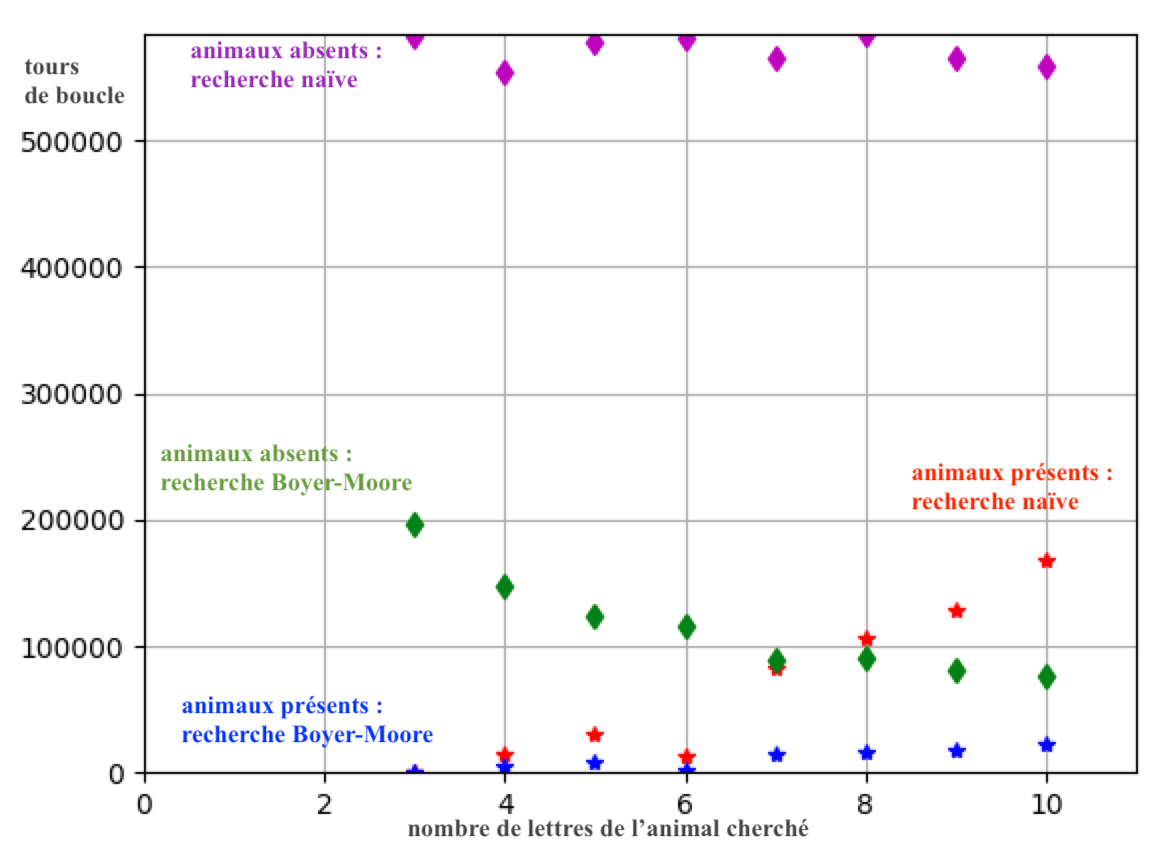